In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

In [7]:
v = 25 #Km/h
fc = 0.9e9 #Hz
N = 2
fs = 1e5
d0 = 0.001e3 #m
d = 0.0100e3 #m
Xsigma = 6 #dB
n = 2
P_tx = 10 #dBm
time_simu = 0.4 #s

In [8]:
def small_fading_rayleigh(N, fc, v, t):
    c = 3e8
    lambda_ = c/fc
    fd = v/lambda_
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    for i in range(N):
        phi = np.random.uniform(-np.pi, np.pi)
        psi = np.random.uniform(-np.pi, np.pi)
        theta = np.random.uniform(-np.pi, np.pi)
        alpha = (2*np.pi*i-np.pi+theta)/(4*N)
        x += np.cos(2 * np.pi * fd * t * np.cos(alpha) + phi)
        y += np.cos(2 * np.pi * fd * t * np.sin(alpha) + psi)
    z = (np.sqrt(2)/np.sqrt(N)) * (x + 1j*y)
    return z, lambda_, fd

In [9]:
def large_rayleigh_fading(vel_m, f_op, N, f_samp, dref, dtxrx, Xsigma, n_medium, Ptx):
    v_mps = (vel_m*5)/18
    t = np.arange(dref/v_mps, dtxrx/v_mps, 1/f_samp)
    vect_d = np.linspace(dref, dtxrx, len(t))
    z, lambda_, fd = small_fading_rayleigh(N, f_op, v_mps, t)
    z_mag_dB = 10 * np.log10(np.abs(z))
    Ls_d0 = ((4*np.pi*d0)/lambda_)**2
    Lp_dB = 10 * np.log10(Ls_d0) + 10 * n_medium * np.log10(vect_d/(d0+1e-14)) + Xsigma
    r_t = Ptx-Lp_dB + z_mag_dB
    r0_t = z_mag_dB
    return r_t, r0_t, t, lambda_, fd

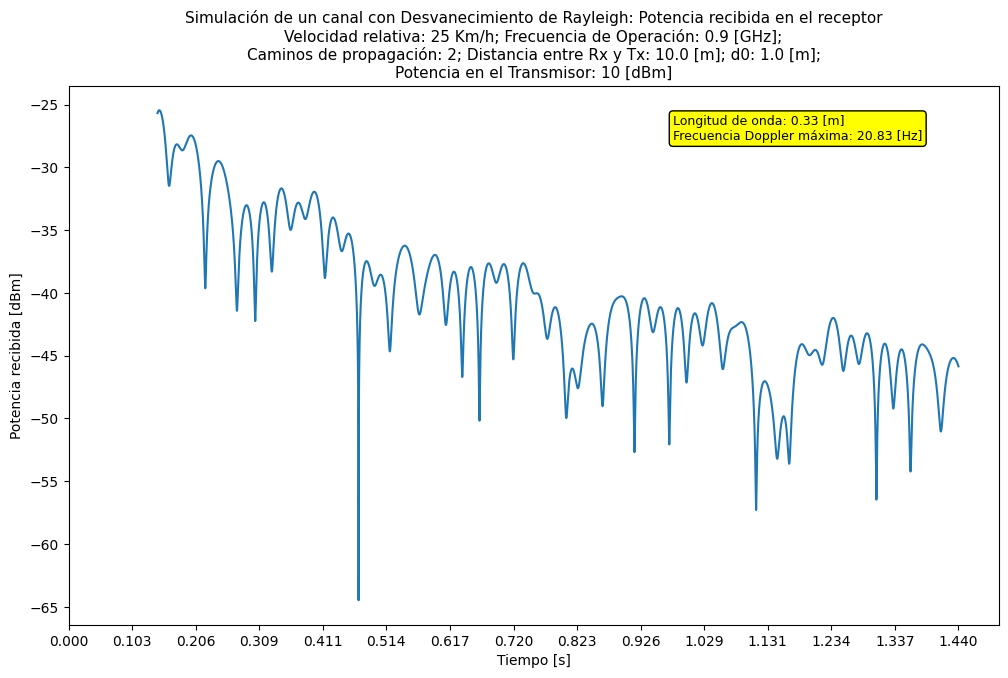

In [10]:
r_t, r0_t, time, lamb, dopfe = large_rayleigh_fading(v, fc, N, fs, d0, d, Xsigma, n, P_tx)
fig = plt.figure(figsize=(12, 7))
plt.plot(time, r_t)
plt.title(f'Simulación de un canal con Desvanecimiento de Rayleigh: Potencia recibida en el receptor\nVelocidad relativa: {v:.0f} Km/h; Frecuencia de Operación: {fc/1e9:.1f} [GHz];\nCaminos de propagación: {N:.0f}; Distancia entre Rx y Tx: {d:.1f} [m]; d0: {d0:.1f} [m];\nPotencia en el Transmisor: {P_tx:.0f} [dBm]', fontsize=11)
plt.xlabel('Tiempo [s]')
plt.ylabel('Potencia recibida [dBm]')
plt.annotate(f'Longitud de onda: {lamb:.2f} [m]\nFrecuencia Doppler máxima: {dopfe:.2f} [Hz]', xy=(0.65, 0.9), xycoords='axes fraction', fontsize=9,
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1))
plt.xticks(np.linspace(0, time[-1], 15))
plt.show()
